In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.optimizers import rmsprop_v2
from tensorflow.keras.optimizers import Adam
import cv2


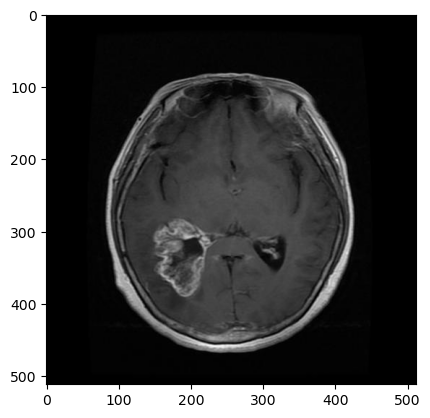

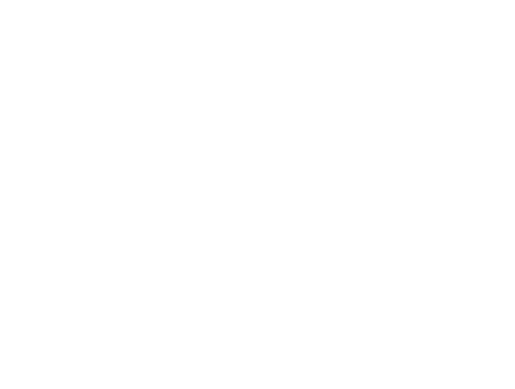

In [2]:
DATA = '/Users/kaiser/Documents/GitHub/Cancer-Diagnosis-AI-based-System/data/Training' #reading the data
CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"] #defining the 4 categories that we have
for category in CATEGORIES:
    path = os.path.join(DATA,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        plt.axis("off")
        break
    break

(-0.5, 149.5, 149.5, -0.5)

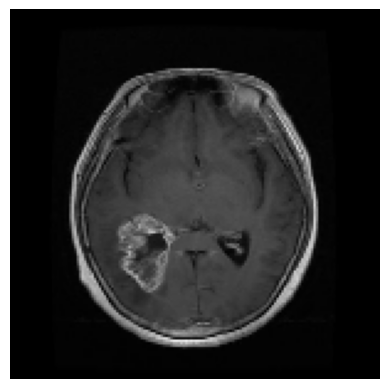

In [3]:
IMG_SIZE = 150
new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
plt.imshow(new_array,cmap="gray")
plt.axis("off")

In [4]:
training_data = [] #manipulating our training data

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATA,category)
        class_num = CATEGORIES.index(category) #defining the different categories of the images in our data
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) #loading the images in grayscale
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
                training_data.append([new_array,class_num]) #adding our data in to the training_data list which we will use to define our X and y for train-tets split
            except Exception as e:
                pass
create_training_data()

In [5]:
X = [] #used for storing  the features
y = [] #used for storing the labels
for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE)
#print(X.shape)
X = X/255.0  
X = X.reshape(-1,150,150,1)
print(X.shape)


(8582, 150, 150, 1)


In [6]:
from keras.utils import to_categorical
y = to_categorical(y, num_classes = 4)

In [7]:
from sklearn.model_selection import train_test_split #splitting the data into training and validaton set
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size = 0.2, random_state=42)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (6865, 150, 150, 1)
x_test shape (1717, 150, 150, 1)
y_train shape (6865, 4)
y_test shape (1717, 4)


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding = 'Same', input_shape=(150, 150, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])



optimizer1 = Adam(learning_rate=0.001)  # Specify the learning rate using 'learning_rate' parameter
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer1,
              metrics=['accuracy'])
epochs = 50  
batch_size = 40
datagen = ImageDataGenerator(  
        rotation_range=0,
        zoom_range = 0,
        width_shift_range=0,  
        height_shift_range=0,  
        horizontal_flip=True,  
        vertical_flip=False)  

/Users/kaiser/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 9, 9, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         4,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,864,260 (18.56 MB)

 Trainable params: 4,864,260 (18.56 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
datagen.fit(X_train)
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val))   

Epoch 1/50


/Users/kaiser/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


172/172 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.4668 - loss: 1.1199 - val_accuracy: 0.6558 - val_loss: 0.7882
Epoch 2/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.7667 - loss: 0.5858 - val_accuracy: 0.8358 - val_loss: 0.4573
Epoch 3/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 195s 1s/step - accuracy: 0.8213 - loss: 0.4464 - val_accuracy: 0.8573 - val_loss: 0.3467
Epoch 4/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.8621 - loss: 0.3633 - val_accuracy: 0.8957 - val_loss: 0.2610
Epoch 5/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.9043 - loss: 0.2513 - val_accuracy: 0.9266 - val_loss: 0.1918
Epoch 6/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 224s 1s/step - accuracy: 0.9292 - loss: 0.1945 - val_accuracy: 0.9365 - val_loss: 0.1619
Epoch 7/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.9365 - loss: 0.1857 - val_accuracy: 0.9493 - val_loss: 0.1384
Epoch 8/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.9440 - loss: 0.1535 - val_accuracy: 0.953

In [14]:
history =  tf.keras.models.load_model('/Users/kaiser/Documents/GitHub/Cancer-Diagnosis-AI-based-System/BrainTumor.h5')

Text(0.5, 0, 'epoch')

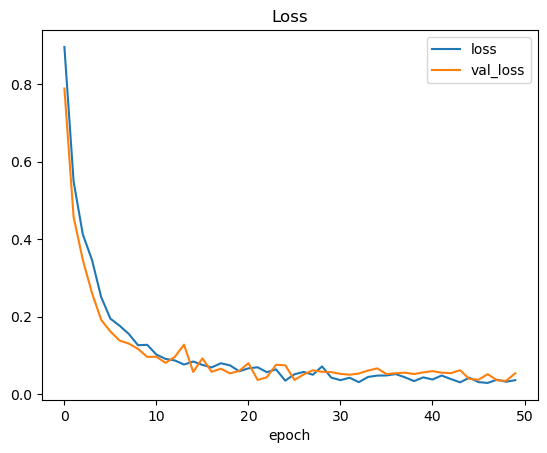

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

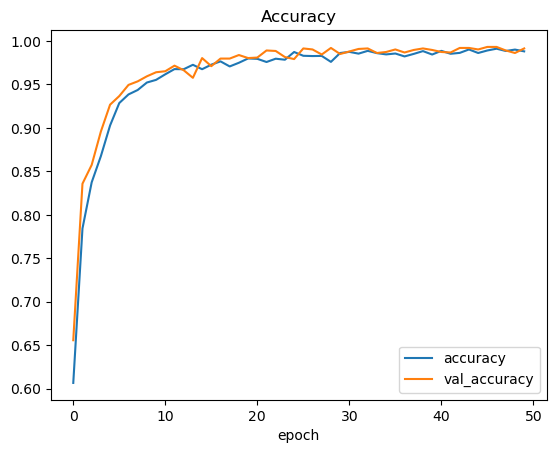

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [13]:
model.save('BrainTumor.h5')

In [14]:
img_array = cv2.imread('/Users/kaiser/Documents/GitHub/Cancer-Diagnosis-AI-based-System/data/Testing/no_tumor/image(4).jpg',cv2.IMREAD_GRAYSCALE) #loading the images in grayscale
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
new_array.shape

(150, 150)

In [15]:
X = new_array.reshape(-1,150,150)
# print(X.shape)
X = X/255.0  
X = X.reshape(-1,150,150,1)
print(X.shape)

(1, 150, 150, 1)


In [17]:
res = model.predict(X)
hmm = res.argmax()
print(hmm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
2


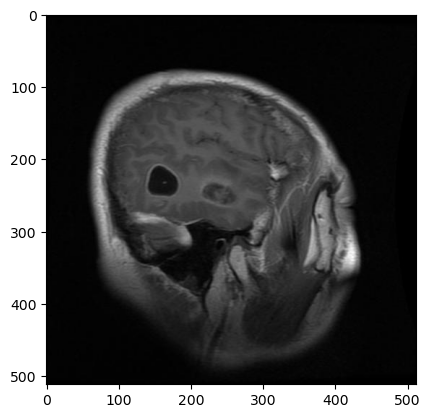

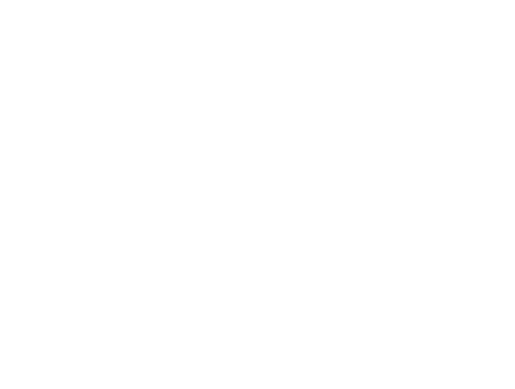

In [18]:
TEST = '/Users/kaiser/Documents/GitHub/Cancer-Diagnosis-AI-based-System/data/Testing' #reading the data
CATEGORIES_TEST = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"] #defining the 4 categories that we have
for category in CATEGORIES_TEST:
    path_test = os.path.join(TEST,category)
    for img in os.listdir(path_test):
        img_test = cv2.imread(os.path.join(path_test,img))
        plt.imshow(img_test)
        plt.show()
        plt.axis("off")
        break
    break

(-0.5, 149.5, 149.5, -0.5)

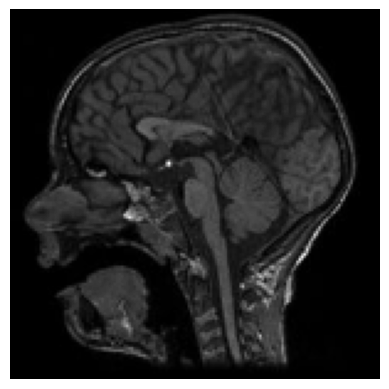

In [19]:
IMG_SIZE = 150
new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
plt.imshow(new_array,cmap="gray")
plt.axis("off")

In [20]:
testing_data = [] #manipulating our training data

def create_testing_data():
    for category in CATEGORIES_TEST:
        path_test = os.path.join(TEST,category)
        class_num_test = CATEGORIES_TEST.index(category) #defining the different categories of the images in our data
        for img_test in os.listdir(path_test):
            try:
                img_array_test = cv2.imread(os.path.join(path_test,img_test),cv2.IMREAD_GRAYSCALE) #loading the images in grayscale
                new_array_test = cv2.resize(img_array_test,(IMG_SIZE,IMG_SIZE)) 
                testing_data.append([new_array_test,class_num_test]) #adding our data in to the training_data list which we will use to define our X and y for train-tets split
            except Exception as e:
                pass
create_testing_data()

In [21]:
print(testing_data[233])

[array([[67, 71, 65, ..., 66, 66, 66],
       [ 7,  2,  1, ...,  0,  0,  0],
       [ 8,  3,  1, ...,  0,  0,  0],
       ...,
       [ 7,  0,  1, ...,  0,  0,  0],
       [ 7,  0,  1, ...,  0,  0,  0],
       [55, 47, 49, ..., 49, 50, 50]], dtype=uint8), 0]


In [22]:
print(testing_data[234])

[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 0]


In [23]:
X_test = [] #used for storing  the features
y_test = [] #used for storing the labels
for features,label in testing_data:
    X_test.append(features)
    y_test.append(label)
X_test = np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE)
#print(X.shape)
X_test = X_test/255.0  
X_test = X_test.reshape(-1,150,150,1)
print(X_test.shape)


(1705, 150, 150, 1)


In [25]:
res = model.predict(X_test[1].reshape(-1,IMG_SIZE,IMG_SIZE,1))
hm = res.argmax()
hm

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


0

In [26]:
result = []
for i in range(1705):
    res = model.predict(X_test[i].reshape(-1,IMG_SIZE,IMG_SIZE,1))
    hm = res.argmax()
    result.append(hm)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

[0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,


In [27]:
y_test = np.array(y_test)
y_test

array([0, 0, 0, ..., 3, 3, 3])

In [28]:
result = np.array(result)
y_test = np.array(y_test)
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(result, y_test)
print("Độ chính xác:", accuracy)


Độ chính xác: 0.9331378299120234


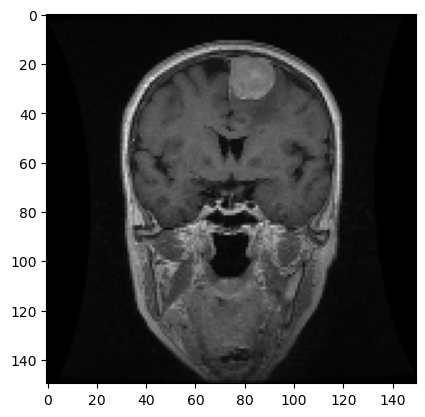

In [6]:
import numpy as np
data = np.load('/Users/kaiser/Downloads/brain_tumor_dataset/images.npy',allow_pickle=True)
from matplotlib import pyplot as plt
new_IMG = cv2.resize(data[24],(150, 150))
plt.imshow(new_IMG, cmap='gray')
plt.show()

In [21]:
label = np.load('/Users/kaiser/Downloads/brain_tumor_dataset/labels.npy',allow_pickle=True)
label = np.array(label)


1

In [22]:
label.shape

(3064,)

In [7]:
data.shape

(3064,)

In [23]:
X_newdata = []
y_newdata = []
for i in range(3064):
    new_IMG = cv2.resize(data[i],(150, 150))
    X_newdata.append(new_IMG)
    y.append(label[i])
X_newdata = np.array(X_newdata).reshape(-1, 150, 150)
X_newdata = X_newdata/255.0
X_newdata = X_newdata.reshape(-1, 150, 150, 1)
print(X_newdata.shape)

(3064, 150, 150, 1)


In [9]:
new_IMG.shape

(150, 150)

In [10]:
L = np.array(new_IMG).reshape(-1, 150, 150)
L = L/255.0
L = L.reshape(-1, 150, 150, 1)
print(L.shape)

(1, 150, 150, 1)
